In [1]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline


In [2]:
# #gap size sweep

# fd_gap = open('test6_gap size sweep from 2 um to 50 um.txt','r') #---------------------------------------need to set--------

# d = np.loadtxt(fd_gap,
#            comments='%',delimiter=None)
# fd.close()

# arg=(np.arange(2,7,1), np.arange(7.5,16,2.5), np.arange(20,51,5)) #make the gap size array
# gap=np.concatenate(arg)
# sweep_para=gap#---------------------------------------------------------need to set-------------------------------------------

In [3]:
# #cell length sweep

# fd_length = open('test7_cell length sweep from 3 to 200 mm2.txt','r') #---------------------------------------need to set--------

# d = np.loadtxt(fd_length,
#            comments='%',delimiter=None)
# fd.close()

# arg=([3], np.arange(5,201,5)) #make the gap size array
# length=np.concatenate(arg)
# sweep_para=length#---------------------------------------------------------need to set-------------------------------------------

In [4]:
# cell radius sweep

fd = open('For the paper cell radius sweep.txt','r')   
#fd = open('test9_cell inner radius sweep from 50 to 1200 um.txt','r')   

d = np.loadtxt(fd,
           comments='%',delimiter=None)
fd.close()

arg=np.arange(51,1200,100) #sweep parameter
sweep_para=arg


In [5]:
#print(len(gap), len(d))

# Data=([])
# Data[0]=d[532:536]
# Data[0]=d[0:40]


dataset=np.split(d,len(sweep_para),axis=0) #data sets of different gap size
#print(dataset[2])

def extract1array(dataset,num): #extract a set of data array
    test=dataset[num] #one set of data
    x_array=test[:,0]
    y_array=test[:,1]
    return (x_array, y_array)
#print(x_array[3])
#print(len(dataset)): 16

In [6]:
#reference paper: acoustic quality factor and energy losses in cylinderical pipes.pdf

def resonance(f, C, f0, r):
    return C/np.sqrt((f**2-f0**2)**2+(r*f)**2)

f0=1950 #central frequency in Hz
r=200*np.pi #estimated resonance width 
C=2e6*np.pi # amplitude factor, which is decided by F/m
p0=[C,f0,r]


In [7]:
def get_data(x_array,y_array,p0):
    
    popt, pcov = scipy.optimize.curve_fit(resonance, x_array, y_array, p0, bounds=([0,1000,0], [2e7,8000,1e4]),maxfev=5000)

    perr = np.sqrt(np.diag(pcov))

    residual = y_array - (resonance(x_array, *popt))

    #print(popt)
    pars_1 = popt[0] #C
    pars_2 = popt[1] #peak frequency f0
    pars_3 = popt[2] #resonance width r

    freq=pars_2
    Q=pars_2/pars_3 # Q factor
    Amp=pars_1/(pars_3*pars_2)# peak vibration amplitude
    #print(popt)
    return [freq,Amp,Q]


In [8]:
# results=[]
# [x_array, y_array]=extract1array(dataset,2)
# [freq,Amp,Q]=get_data(x_array,y_array,p0)
# results=([freq,Amp,Q])

# print(results)

results=[]
for i in range(0,len(dataset),1):
    #print(i)
    [x_array, y_array]=extract1array(dataset,i)
    [freq,Amp,Q]=get_data(x_array,y_array,p0)
    results.append([freq, Amp, Q])

results=np.array(results)    
#print(results)
#print(results[:,1])

#print(results)
    
    

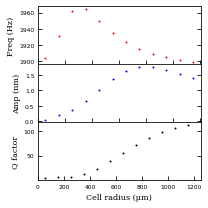

In [9]:
#%matplotlib notebook

fig = plt.figure(figsize=(3,3))

gs = gridspec.GridSpec(3,1, height_ratios=[1,1,1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
gs.update(hspace=0, wspace=0) 


#freq
ax1.plot(sweep_para, results[:,0], "r.",markersize=2)
# Amp
ax2.plot(sweep_para, results[:,1], "b.",markersize=2)
# Q
ax3.plot(sweep_para, results[:,2], "k.",markersize=2)   



# ax1.set_ylim(1800,2100)

# ax2.set_ylim(0,2)

ax3.set_xlim(0,1250)

# ax3.set_xlabel("gap size (\u03BCm)",family="serif",  fontsize=12)#---------------------------------------------------------need to set---
ax3.set_xlabel("Cell radius (\u03BCm)",family="serif", fontsize=8)#---------------------------------------------------------need to set---
ax1.set_ylabel("Freq (Hz)",family="serif", fontsize=8)
ax2.set_ylabel("Amp (nm)",family="serif", fontsize=8)
ax3.set_ylabel("Q factor",family="serif", fontsize=8)



ax1.tick_params(axis='x',which='major', direction="in", bottom="on", length=4, labelbottom=False, labelsize=6)
ax1.tick_params(axis='y',which='major', direction="in", right="on", length=4, labelsize=6, labelleft=True)
#ax1.tick_params(axis='y',which='minor', direction="in", left="on", length=2, )


ax2.tick_params(axis='x',which='major', direction="in", bottom="on", length=4, labelbottom=False, labelsize=6)
ax2.tick_params(axis='y',which='major', direction="in", right="on", length=4, labelsize=6, labelleft=True)

ax3.tick_params(axis='x',which='major', direction="in", bottom="on", length=4, labelbottom=True, labelsize=6)
ax3.tick_params(axis='y',which='major', direction="in", right="on", length=4, labelsize=6, labelleft=True)

fig.tight_layout()

fig.savefig(timestr+"Cell radius sweep.png", format="png",dpi=300)
plt.show()
